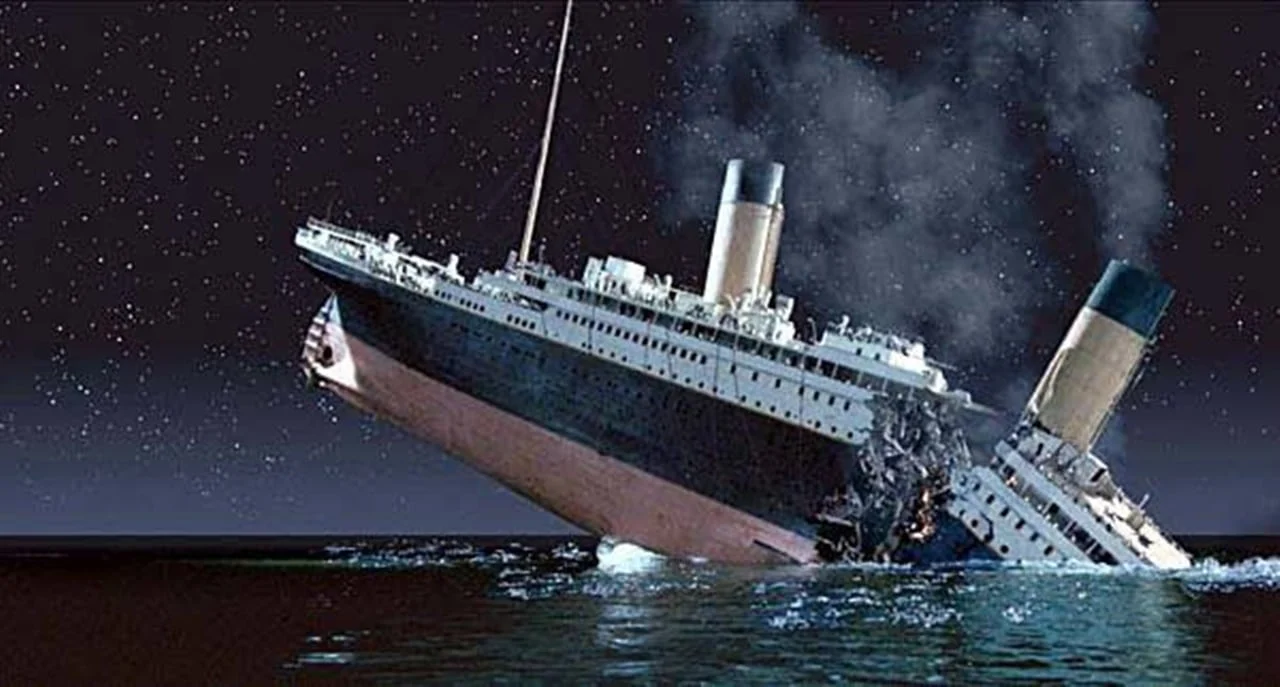

# BUSINESS UNDERSTANDING
[Naufrágio do RMS Titanic](https://pt.wikipedia.org/wiki/Naufr%C3%A1gio_do_RMS_Titanic)

# DATA UNDERSTANDING

Titanic - Machine Learning from Disaster<br>

[Dataset](https://www.kaggle.com/c/titanic)

In [1]:
# METADADOS:
# Passenger ID: ID do passageiro (número único para cada um dos passageiros)
# Survived: sobrevivente (0 = Não, 1 = Sim) ---> VARIÁVEL TARGET
# Pclass: Classe da passagem (1 = primeira classe, 2 = segunda classe, 3 = terceira classe)
# Name: nome do passageiro
# Sex: Gênero do passageiro
# Age: Idade (em anos) do passageiro
# SibSp: número de irmãos / cônjuges a bordo do Titanic
# Parch: número de pais / filhos a bordo do Titanic
# Ticket: número do ticket
# Fare: tarifa da passagem
# Cabin: número da cabine
# Embarked: porto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton)

# Title

Predição de sobrevivemtes no naufráfio do Titanic

# Head

In [2]:
# Machine Learning - CLASSIFICAÇÃO - Prevendo o número de sobreviventes do Titanic
# by geanclm on 12/03/2022 at 18h14
# update by geanclm on 04/11/2023

# Local files

In [3]:
!dir

 O volume na unidade C ‚ Windows
 O N£mero de S‚rie do Volume ‚ 9241-82D4

 Pasta de C:\Users\geanc\OneDrive\Documentos\GitHub\kaggle\Titanic

24/12/2023  06:15    <DIR>          .
21/12/2023  18:18    <DIR>          ..
16/12/2023  14:58    <DIR>          .ipynb_checkpoints
23/12/2023  11:58             3.258 CLASSIFICA€ÇO_Titanic_Kaggle_csv_1-2023-12-23.csv
24/12/2023  02:47         2.188.110 CLASSIFICA€ÇO_Titanic_Kaggle_csv_1.ipynb
24/12/2023  06:15         3.533.822 CLASSIFICA€ÇO_Titanic_Kaggle_csv_2.ipynb
29/11/2023  09:13             3.258 gender_submission.csv
29/11/2023  09:13            18.221 rms-titanic-bill-cannon.jpg
29/11/2023  09:13            28.629 test.csv
29/11/2023  09:13         1.428.790 titanic.png
29/11/2023  09:13            93.134 titanic.webp
29/11/2023  09:13            61.194 train.csv
29/11/2023  09:13            52.097 Your First Entry.png
              10 arquivo(s)      7.410.513 bytes
               3 pasta(s)   856.796.499.968 bytes dispon¡veis


# Library installation

# Import libs

In [4]:
import os

import pandas as pd
import numpy as np

# gerar gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# função utilizada para registrar data e hora no nome do modelo salvo
# esse recurso serve para versionar cada novo modelo criado de acordo com a data em que foi gerado
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import KFold

# Validação cruzada
from sklearn.model_selection import GridSearchCV

# Load data

In [5]:
df_gender_submission = pd.read_csv('gender_submission.csv')
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

# Exploratory Analysis

In [6]:
df_gender_submission.tail(3)

,PassengerId,Survived
415,1307,0
416,1308,0
417,1309,0


In [7]:
# Análise da base train

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df_train.Survived.value_counts()/df_train.shape[0]

Survived
0    0.616162
1    0.383838
Name: count, dtype: float64

In [11]:
df_train.dtypes.value_counts()

int64      5
object     5
float64    2
Name: count, dtype: int64

In [12]:
df_train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [13]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


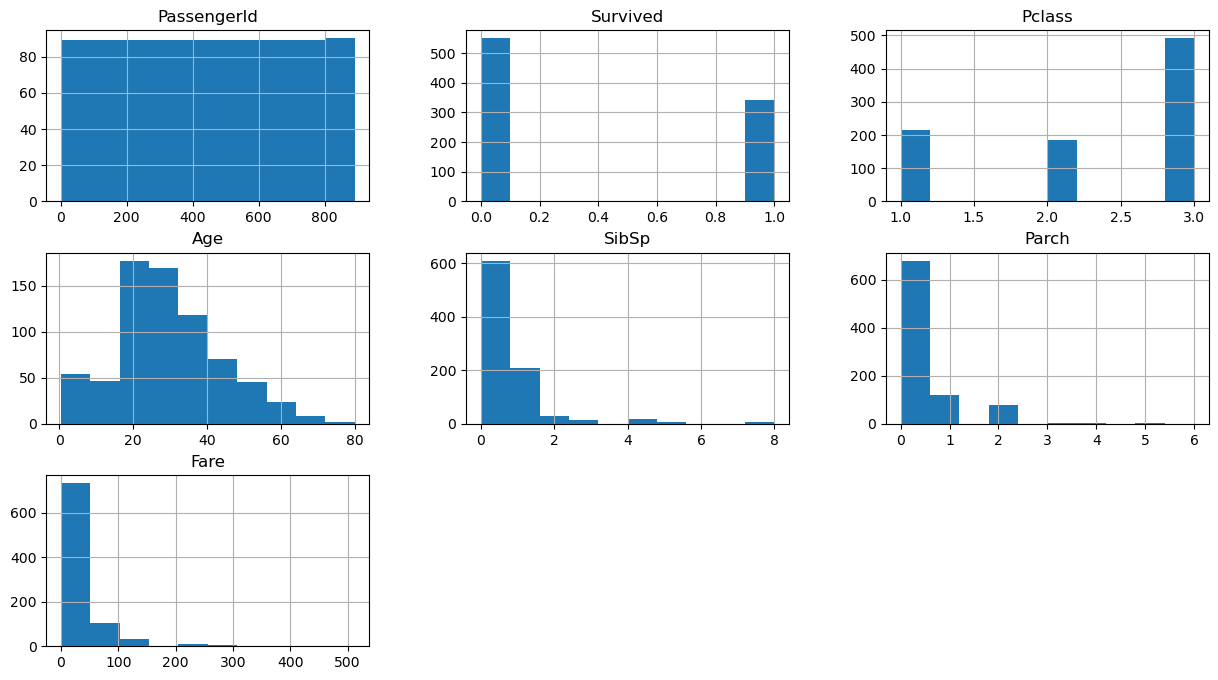

In [14]:
df_train.hist(figsize=(15,8));

In [15]:
# Análise da base test

In [16]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [17]:
df_test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [18]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


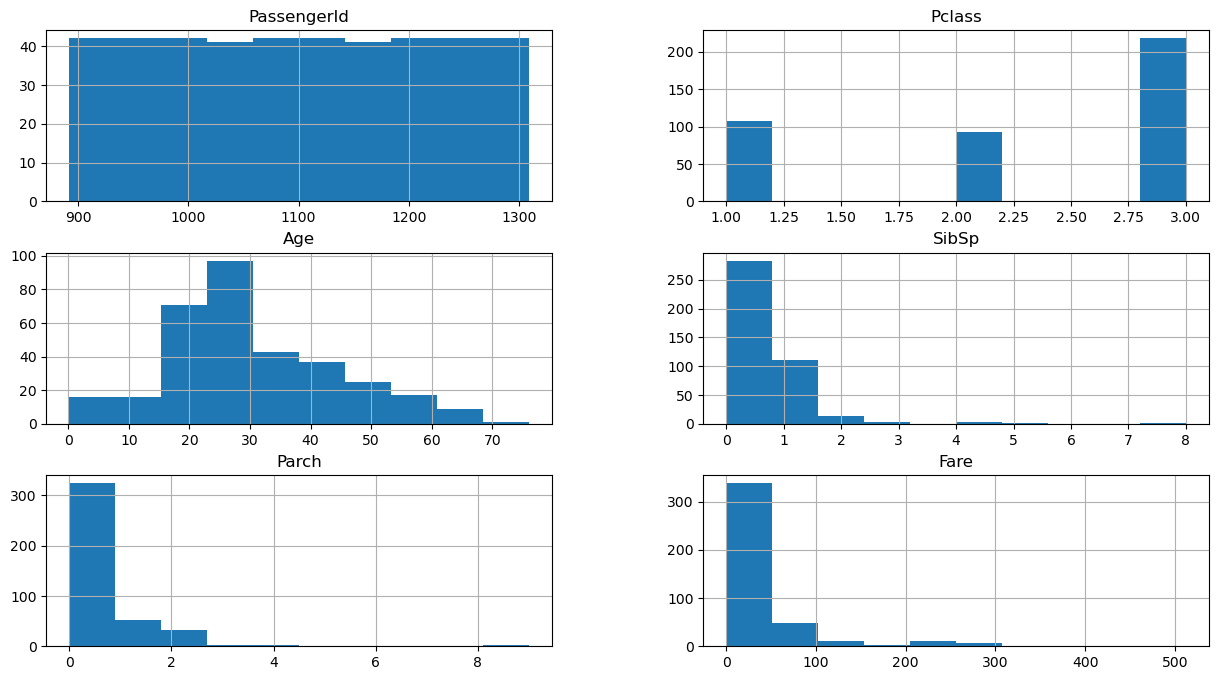

In [19]:
df_test.hist(figsize=(15,8));

In [20]:
df_test['Age'].tail(10)

408     NaN
409     3.0
410     NaN
411    37.0
412    28.0
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, dtype: float64

Total de registros: 891
Quantidade de valores nulos: 0
Quantiadade de valores únicos: 2
Valores únicos: ['male' 'female']

Quantidade de cada tipo de dado da coluna 
Sex
male      577
female    314
Name: count, dtype: int64

Percentual de cada tipo em relação ao total da coluna 
Sex
male      0.647587
female    0.352413
Name: count, dtype: float64

Agrupamento de dados em relação aos sobreviventes: 
Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: PassengerId, dtype: int64



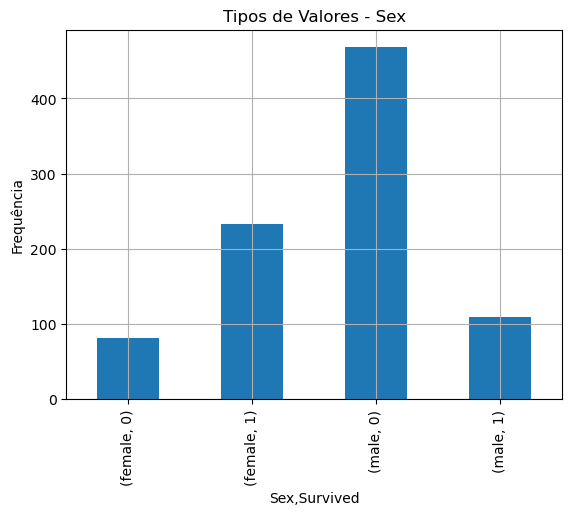

In [48]:
# Função para análise de quantitativo de passageiros de acordo com a coluna 'Survived'
def analisar (base, coluna, bool = True):    
    print (f'Total de registros: {base[coluna].value_counts().sum()}')    
    print (f'Quantidade de valores nulos: {base[coluna].isnull().sum()}')
    print (f'Quantiadade de valores únicos: {base[coluna].nunique()}')
    print (f'Valores únicos: {base[coluna].unique()}')
    print ('')
    print (f'Quantidade de cada tipo de dado da coluna \n{base[coluna].value_counts()}')
    print ('')
    print (f'Percentual de cada tipo em relação ao total da coluna \n{base[coluna].value_counts()/base.Sex.shape[0]}')
    print ('')
    print (f'Agrupamento de dados em relação aos sobreviventes: \n{base.groupby([coluna,"Survived"])["PassengerId"].count()}')    
    print ('')
    if bool == True:
        # base[coluna].value_counts().plot.bar(grid=True, title= f'Tipos de Valores - {coluna}', ylabel = 'Frequência');
        base.groupby([coluna,"Survived"])["PassengerId"].count().plot.bar(grid=True, title= f'Tipos de Valores - {coluna}', ylabel = 'Frequência');
    else:
        sns.displot(base[coluna], kde = True);
analisar(df_train, 'Sex', True)

# DATA PREPARATION

<center style="font-size:18pt; background-color:#0f79b6">
    <br/>
        <b style="color: #ffffff">
            DATA PREPARATION
        </b>
    <br/>&nbsp;
</center>

In [21]:
# Eliminar colunas sem efeito para o modelo na base TRAIN
df_train = df_train.drop(['Name','Cabin','Ticket'], axis=1)

In [22]:
# Eliminar colunas sem efeito para o modelo na base TEST
df_test = df_test.drop(['Name','Cabin','Ticket'], axis=1)

In [23]:
# média de idades dos passageiros
df_train.Age.mean()

29.69911764705882

In [24]:
# Ajustando os dados faltantes da coluna "Age" com a média de todas as idades da base
df_train.loc[df_train.Age.isnull(), 'Age'] = df_train.Age.mean()
df_test.loc[df_test.Age.isnull(), 'Age'] = df_test.Age.mean()

In [25]:
df_train.isnull().sum().sort_values(ascending=False)

Embarked       2
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [26]:
df_test.isnull().sum().sort_values(ascending=False)

Fare           1
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

In [27]:
df_train.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [28]:
df_train.Embarked.mode()[0]

'S'

In [29]:
df_train.loc[df_train.Embarked.isnull(), 'Embarked'] = df_train.Embarked.mode()[0]

In [30]:
df_train.Embarked.value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [31]:
df_test.Fare.describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [32]:
# Preencher os dados nulos da Tarifa "Fare" com a média dos valores
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test.Fare.mean()

In [33]:
# Substituir textos da coluna 'Sex' por valores '0 = male'  e '1 = female'
def sex(texto):
    if texto == 'female':
        return 1
    else:
        return 0    
df_train['Sex_bin'] = df_train['Sex'].map(sex)
df_test['Sex_bin'] =  df_test['Sex'].map(sex)

In [34]:
df_train.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_bin
886,887,0,2,male,27.000000,0,0,13.00,S,0
887,888,1,1,female,19.000000,0,0,30.00,S,1
888,889,0,3,female,29.699118,1,2,23.45,S,1
889,890,1,1,male,26.000000,0,0,30.00,C,0
890,891,0,3,male,32.000000,0,0,7.75,Q,0


In [35]:
df_test.tail()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_bin
413,1305,3,male,30.27259,0,0,8.0500,S,0
414,1306,1,female,39.00000,0,0,108.9000,C,1
415,1307,3,male,38.50000,0,0,7.2500,S,0
416,1308,3,male,30.27259,0,0,8.0500,S,0
417,1309,3,male,30.27259,1,1,22.3583,C,0


In [36]:
# selecionar somente as colunas numéricas da base para filtrar somente dados numéricas
col_df_train_nr = df_train.columns[df_train.dtypes != 'object']
col_df_test_nr = df_test.columns[df_test.dtypes != 'object']

In [37]:
# DATA FRAME somente com as colunas numéricas - df_train e df_test
df_train_nr = df_train.loc[:,col_df_train_nr]
df_test_nr = df_test.loc[:,col_df_test_nr]

In [38]:
df_train_nr.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_bin
886,887,0,2,27.000000,0,0,13.00,0
887,888,1,1,19.000000,0,0,30.00,1
888,889,0,3,29.699118,1,2,23.45,1
889,890,1,1,26.000000,0,0,30.00,0
890,891,0,3,32.000000,0,0,7.75,0


In [39]:
df_test_nr.tail()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_bin
413,1305,3,30.27259,0,0,8.0500,0
414,1306,1,39.00000,0,0,108.9000,1
415,1307,3,38.50000,0,0,7.2500,0
416,1308,3,30.27259,0,0,8.0500,0
417,1309,3,30.27259,1,1,22.3583,0


# DATA VISUALIZATION

<center style="font-size:18pt; background-color:#0f79b6">
    <br/>
        <b style="color: #ffffff">
            DATA VISUALIZATION
        </b>
    <br/>&nbsp;
</center>

In [264]:
# Passageiros com menos de 1 ano de idade
# QUESTIONAMENTO by geanclm: as idades em float podem interfir no modelo?
(df_train[df_train['Age']<1])

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_bin
78,79,1,2,male,0.83,0,2,29.0000,S,0
305,306,1,1,male,0.92,1,2,151.5500,S,0
469,470,1,3,female,0.75,2,1,19.2583,C,1
644,645,1,3,female,0.75,2,1,19.2583,C,1
755,756,1,2,male,0.67,1,1,14.5000,S,0
803,804,1,3,male,0.42,0,1,8.5167,C,0
831,832,1,2,male,0.83,1,1,18.7500,S,0


In [193]:
female = df_train[df_train['Sex'] == 'female']['Survived']
rate_fem = sum(female)/len(female)
print('% de mulheres sobreviventes: {}'.format(rate_fem))
male = df_train[df_train['Sex'] == 'male']['Survived']
rate_male = sum(male)/len(male)
print('% de homens sobreviventes: {}'.format(rate_male))

% de mulheres sobreviventes: 0.7420382165605095
% de homens sobreviventes: 0.18890814558058924


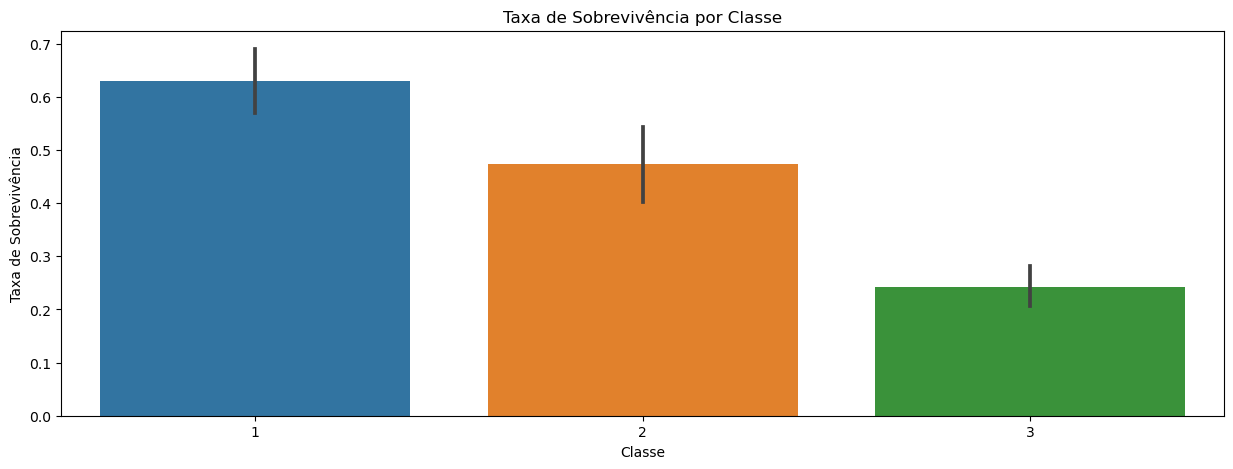

In [194]:
# Análise de sobreviventes de acordo com a classe do passageiro
plt.figure(figsize=(15, 5))
sns.barplot(x='Pclass', y='Survived', data=df_train)
plt.xlabel('Classe')
plt.ylabel('Taxa de Sobrevivência')
plt.title('Taxa de Sobrevivência por Classe')
plt.show()

In [195]:
# Análise da correlação entre as variáveis da base de dados - somende com dados numéricos
# sns.heatmap(df_train.corr(), square = True, linewidths= .5, annot=True, fmt='.2f');

# Separando dados em X e y

In [196]:
var = ['Sex_bin', 'Age']
X = df_train_nr[var]
y = df_train_nr['Survived']

# RandomForestClassifier

<center style="font-size:18pt; background-color:#c9d976">
    <br/>
        <b style="color: #033409">
            RandomForestClassifier
        </b>
    <br/>&nbsp;
</center>

In [197]:
# Treinar o modelo
params = {    
    'n_estimators': np.arange(100, 150, 50),
    # 'max_depth': np.arange(5, 15, 5),
    'n_jobs': np.array([-1])
}
rfc = GridSearchCV(
    RandomForestClassifier(),
    params,                                    
    cv=10,                                     
    scoring='roc_auc',
#     verbose=5,
)

In [198]:
X.head(3)

,Sex_bin,Age
0,0,22.0
1,1,38.0
2,1,26.0


In [199]:
X.isnull().sum().sort_values(ascending=False)

Sex_bin    0
Age        0
dtype: int64

In [200]:
y.head(3)

0    0
1    1
2    1
Name: Survived, dtype: int64

In [201]:
# QUESTIONAMENTO by geanclm: a função fillna pode afetar o modelo?
# X = X.fillna(-1)

In [202]:
rfc.fit(X,y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': array([100]), 'n_jobs': array([-1])},
             scoring='roc_auc')

In [203]:
rfc.best_params_, rfc.best_score_, rfc.best_estimator_, rfc.best_index_

({'n_estimators': 100, 'n_jobs': -1},
 0.7948402512520159,
 RandomForestClassifier(n_jobs=-1),
 0)

In [204]:
df_test.head(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_bin
0,892,3,male,34.5,0,0,7.8292,Q,0
1,893,3,female,47.0,1,0,7.0000,S,1
2,894,2,male,62.0,0,0,9.6875,Q,0


In [205]:
X_prev = df_test[var]

In [206]:
X_prev.head()

,Sex_bin,Age
0,0,34.5
1,1,47.0
2,0,62.0
3,0,27.0
4,1,22.0


In [207]:
# X_prev = X_prev.fillna(-1)

In [208]:
prediction = rfc.predict(X_prev)

In [209]:
prediction

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# Sumission para o Kaggle - 1

In [210]:
sub = pd.Series(prediction, index=df_test['PassengerId'], name='Survived')

In [211]:
sub.shape

(418,)

In [212]:
# Salvar com o nome do arquivo atual em variável para salvar a predição com mesmo nome
# by geanclm on 16/12/2023
file_path = os.getcwd()
for _, _, arquivo in os.walk(file_path):
    # print(arquivo)
    file = arquivo[1][:35]
# - - -
current_date = datetime.today().strftime('%Y-%m-%d')
# - - -
file_name = f'{file}{current_date}.csv'
# sub.to_csv(file_name, header=True, index=False)
sub.to_csv(file_name, header=True)

In [213]:
file_name

'CLASSIFICAÇÃO_Titanic_Kaggle_csv_1-2023-12-23.csv'

In [214]:
!type {file_name}

PassengerId,Survived
892,0
893,1
894,0
895,1
896,1
897,0
898,1
899,0
900,1
901,0
902,0
903,0
904,1
905,0
906,1
907,1
908,0
909,0
910,1
911,0
912,0
913,1
914,0
915,0
916,1
917,0
918,1
919,0
920,0
921,0
922,0
923,0
924,1
925,0
926,0
927,0
928,0
929,1
930,0
931,0
932,0
933,0
934,0
935,1
936,0
937,0
938,0
939,0
940,1
941,1
942,0
943,1
944,0
945,1
946,0
947,0
948,0
949,0
950,0
951,1
952,0
953,0
954,0
955,1
956,1
957,0
958,1
959,0
960,0
961,1
962,1
963,0
964,1
965,0
966,1
967,0
968,0
969,1
970,0
971,1
972,1
973,0
974,0
975,0
976,0
977,0
978,1
979,1
980,0
981,0
982,1
983,0
984,1
985,0
986,0
987,0
988,1
989,0
990,0
991,0
992,1
993,1
994,0
995,0
996,1
997,0
998,0
999,0
1000,0
1001,0
1002,0
1003,0
1004,1
1005,1
1006,1
1007,0
1008,0
1009,1
1010,0
1011,1
1012,0
1013,0
1014,1
1015,0
1016,0
1017,1
1018,0
1019,0
1020,0
1021,0
1022,0
1023,0
1024,0
1025,0
1026,0
1027,0
1028,0
1029,0
1030,1
1031,0
1032,0
1033,1
1034,0
1035,0
1036,0
1037,0
1038,0
1039,0
1040,0
1041,0
1042,1
1043,0
1044,0
1045,1
1046,1
10

# ENTENDO O MÓDULO sklearn.model_selection

In [215]:
# Gerar uma série numérica de 10 números inteiros
X_praticar_lib = np.arange(10)
X_praticar_lib

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [216]:
# Aplicar a função para dividir a base de dados na proporção de trinta porcento para teste e setenta para treino
train_test_split(X_praticar_lib, test_size=0.3)

[array([9, 1, 7, 4, 2, 8, 0]), array([5, 6, 3])]

# SEPARANDO VARIÁVEIS EM TREINO E TESTE - 1

In [217]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X,y, test_size=0.3)

In [218]:
X_tr.shape, X_ts.shape, y_tr.shape, y_ts.shape

((623, 2), (268, 2), (623,), (268,))

In [219]:
rfc.fit(X_tr, y_tr)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': array([100]), 'n_jobs': array([-1])},
             scoring='roc_auc')

In [220]:
prediction = rfc.predict(X_ts)

In [221]:
y_ts.tail(3)

509    1
235    0
683    0
Name: Survived, dtype: int64

In [222]:
# prediction

In [223]:
# Considerando todas as mulheres sobreviventes para veriricar a métrica do modelo
mulheres = (X_ts['Sex_bin']==1).astype(np.int64)
np.mean(y_ts == mulheres)

0.8059701492537313

In [224]:
# percentual de acertos efetivos do modelo
# 0.7723880597014925
np.mean(y_ts == prediction)

0.7649253731343284

# Validação cruzada

In [225]:
# teste com a variável para entender o processo da validação cruzada
X_praticar_lib

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [226]:
kf = KFold(3, shuffle=True)
for linhas_treino, linhas_teste in kf.split(X_praticar_lib):
    print (f'teino {linhas_treino} | teste {linhas_teste}')

teino [0 1 2 4 7 9] | teste [3 5 6 8]
teino [0 1 3 5 6 7 8] | teste [2 4 9]
teino [2 3 4 5 6 8 9] | teste [0 1 7]


In [227]:
resultados = []
for rep in range(10):
    print(f'rep: {rep}')
    kf = KFold(2, shuffle=True)
    for linhas_treino, linhas_teste in kf.split(X):
        print (f'teino {linhas_treino.shape[0]}')
        print (f'teste {linhas_teste.shape[0]}')
        # print()
        X_tr, X_ts = X.iloc[linhas_treino], X.iloc[linhas_teste]    
        y_tr, y_ts = y.iloc[linhas_treino], y.iloc[linhas_teste]
        # print(X_tr.head())
        # print()
        # modelo = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=0)
        # rfc.fit(X_tr, y_tr)
        p = rfc.predict(X_ts)
        acc = np.mean(y_ts == p)
        resultados.append(acc)
        print(f'acc : {acc}')
        print()

rep: 0
teino 445
teste 446
acc : 0.8026905829596412

teino 446
teste 445
acc : 0.8112359550561797

rep: 1
teino 445
teste 446
acc : 0.8004484304932735

teino 446
teste 445
acc : 0.8134831460674158

rep: 2
teino 445
teste 446
acc : 0.8094170403587444

teino 446
teste 445
acc : 0.8044943820224719

rep: 3
teino 445
teste 446
acc : 0.8071748878923767

teino 446
teste 445
acc : 0.8067415730337079

rep: 4
teino 445
teste 446
acc : 0.8139013452914798

teino 446
teste 445
acc : 0.8

rep: 5
teino 445
teste 446
acc : 0.8094170403587444

teino 446
teste 445
acc : 0.8044943820224719

rep: 6
teino 445
teste 446
acc : 0.773542600896861

teino 446
teste 445
acc : 0.8404494382022472

rep: 7
teino 445
teste 446
acc : 0.7982062780269058

teino 446
teste 445
acc : 0.8157303370786517

rep: 8
teino 445
teste 446
acc : 0.804932735426009

teino 446
teste 445
acc : 0.8089887640449438

rep: 9
teino 445
teste 446
acc : 0.8094170403587444

teino 446
teste 445
acc : 0.8044943820224719



In [228]:
len(resultados), np.mean(resultados)

(20, 0.806963017080667)

# SEPARANDO VARIÁVEIS EM TREINO E TESTE - 2

In [229]:
X = df_train_nr.drop(['PassengerId','Survived'], axis=1)
y = df_train_nr.Survived
X_tr, X_ts, y_tr, y_ts = train_test_split(X,y, test_size=0.3)

In [230]:
rfc.fit(X_tr, y_tr)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': array([100]), 'n_jobs': array([-1])},
             scoring='roc_auc')

In [231]:
prediction = rfc.predict(X_ts)

In [232]:
# 0.7761194029850746
# 0.8619402985074627
accuracy_score(y_ts, prediction)

0.7649253731343284

In [233]:
# array([[138,  26],
#        [ 34,  70]], dtype=int64)

# array([[160,  10],
#        [ 27,  71]], dtype=int64)

# array([[155,  17],
#        [ 16,  80]], dtype=int64)

confusion_matrix(y_ts, prediction)

array([[134,  25],
       [ 38,  71]], dtype=int64)

In [234]:
df_test_nr.tail(3)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_bin
415,1307,3,38.50000,0,0,7.2500,0
416,1308,3,30.27259,0,0,8.0500,0
417,1309,3,30.27259,1,1,22.3583,0


In [235]:
X_test = df_test_nr.drop(['PassengerId'], axis=1)

In [236]:
X_test.tail(3)

,Pclass,Age,SibSp,Parch,Fare,Sex_bin
415,3,38.50000,0,0,7.2500,0
416,3,30.27259,0,0,8.0500,0
417,3,30.27259,1,1,22.3583,0


In [237]:
prediction = rfc.predict(X_test)

In [238]:
sub = pd.Series(prediction, index=df_test_nr['PassengerId'], name='Survived')

In [239]:
sub.tail()

PassengerId
1305    0
1306    1
1307    0
1308    0
1309    0
Name: Survived, dtype: int64

<center style="font-size:18pt; background-color:#0f79b6">
    <br/>
        <b style="color: #ffffff">
            INSHIGHTS
        </b>
    <br/>&nbsp;
</center>

In [240]:
# 1 - eliminar registros com dado de idade faltante
# 2 - arredondar idade
# 3 - converter coluna Age para inteiro
# 4 - Importante pensar em TREINO, VALIDAÇÃO e TESTE com a base existente